# Imports

In [107]:
import datasets
import torch
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load CIFAR-100

In [79]:
ds = datasets.load_dataset('cifar100',
                           cache_dir='./cache',
                           trust_remote_code=True).with_format('pt')

print(ds)

DatasetDict({
    train: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 10000
    })
})


# Get Image Size and Set Patch Shape

In [83]:
img = ds['train'][0]['img']

W, H, C = img.shape
Wp, Hp, Cp = 4, 4, C

img_shape = list(img.shape)
patch_shape = [Wp, Hp, Cp]
num_patches = int(np.prod(img_shape)/np.prod(patch_shape))

print(f'Image shape: {img.shape}')
print(f'Patch shape: {patch_shape}')
print(f'# Patches: {num_patches}')

Image shape: torch.Size([32, 32, 3])
Patch shape: [4, 4, 3]
# Patches: 64


# Test How to Patchify Efficiently

In [86]:
true_patch = img[:Wp, :Hp, :Cp].flatten()
print(true_patch.shape)
#test_patch = torch.ones(true_patch.shape)
test_patch = img.unfold(0, Wp, Wp).unfold(1, Hp, Hp)
print(test_patch.shape)
test_patch = test_patch.permute(0, 1, 3, 4, 2).reshape((num_patches, -1))[0]
print(test_patch.shape)

print(true_patch == test_patch)

torch.Size([48])
torch.Size([8, 8, 3, 4, 4])
torch.Size([48])
tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True])


# Display Image

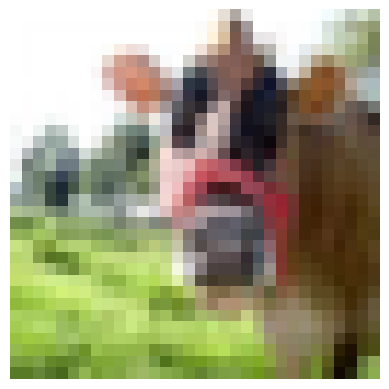

In [87]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
plt.show()

# Patchify and Display a Single Image

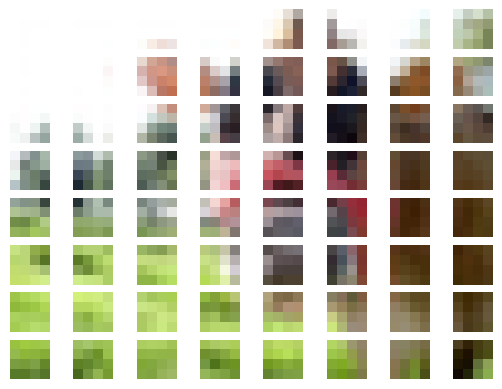

In [90]:
patches = img.unfold(0, Wp, Wp).unfold(1, Hp, Hp).permute(0, 1, 3, 4, 2).reshape((num_patches, -1))

x, y, _ = np.array(img_shape)/np.array(patch_shape)
x, y = int(x), int(y)

fig, ax = plt.subplots(nrows=y, ncols=x)
for i in range(y):
    for j in range(x):
        ax[i, j].imshow(patches[i*y+j].reshape(Wp, Hp, Cp))
        ax[i, j].axis('off')
plt.show()
        

# Display Batch of 2

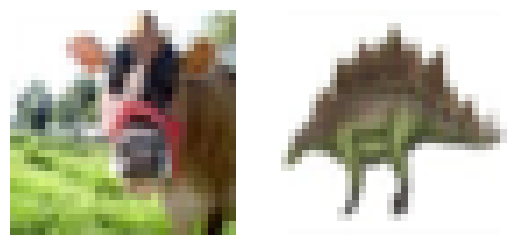

In [92]:
fig, ax = plt.subplots(1, 2)
images = ds['train'][:2]['img']
ax[0].imshow(images[0])
ax[1].imshow(images[1])
ax[0].axis('off')
ax[1].axis('off')
plt.show()

# Patchify for Batch

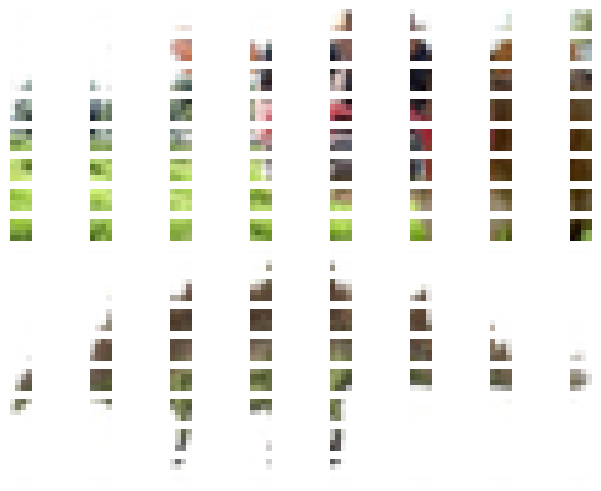

In [110]:
images = ds['train'][:2]['img']
patches = images.unfold(1, Wp, Wp).unfold(2, Hp, Hp).permute(0, 1, 2, 4, 5, 3).reshape((2, num_patches, -1))

x, y, _ = np.array(img_shape)/np.array(patch_shape)
x, y = int(x), int(y)

fig, ax = plt.subplots(nrows=y*2, ncols=x)
image_grid = [[]*x]*(y*2)
for i in range(2):
    for j in range(y):
        for k in range(x):
            ax[i*y+j, k].imshow(patches[i, j*y+k].reshape(Wp, Hp, Cp))
            ax[i*y+j, k].axis('off')

plt.show()
        